In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
import warnings
warnings.filterwarnings("ignore")

In [62]:
df = pd.read_csv("D:\SEM 6 PRACTICAL\datasets\StudentsPerformance.csv")

In [63]:
df.head(4)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [65]:
df.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [66]:
df.shape

(1000, 8)

In [67]:
df.isnull().sum().sum()

0

In [68]:
df['math score'] = df['math score'].fillna(df['math score'].mean() , inplace = True)

In [69]:
columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score']
numeric_features = list()
for column in columns:
    if df[column].dtype == 'int64':
        numeric_features.append(column)

print(numeric_features)

['reading score', 'writing score']


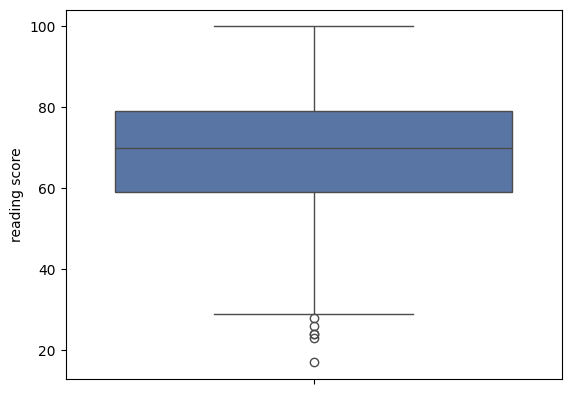

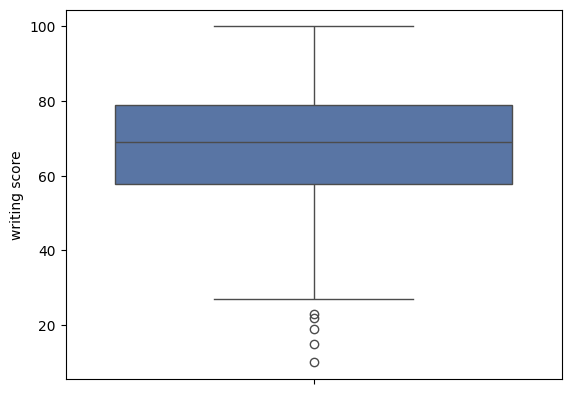

In [70]:
for feature in numeric_features:
    sns.boxplot(df[feature], palette="deep")
    plt.show()
    

In [71]:
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    df = df[(df[column]>= lower_bound) & (df[column]<= upper_bound)]
    return df

In [72]:
df = handle_outliers_iqr(df, 'reading score')


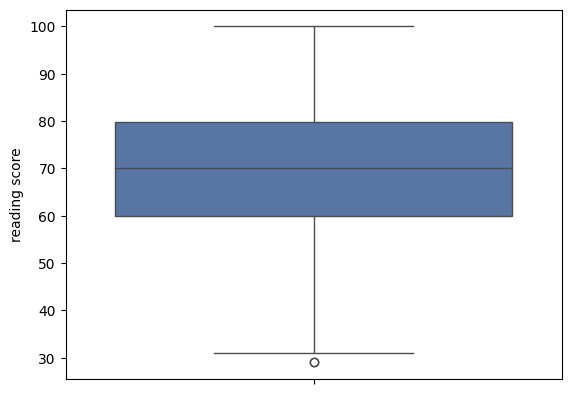

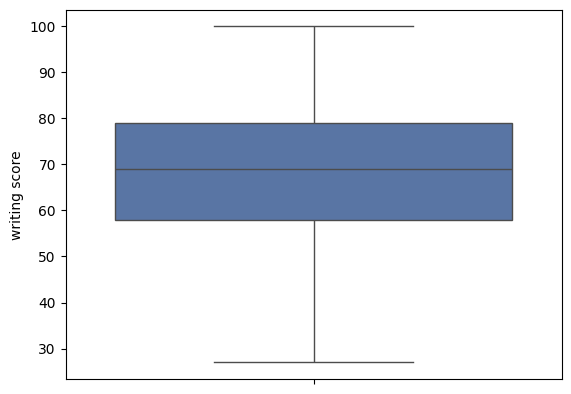

In [73]:
for feature in numeric_features:
    sns.boxplot(df[feature], palette="deep")
    plt.show()

In [74]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler


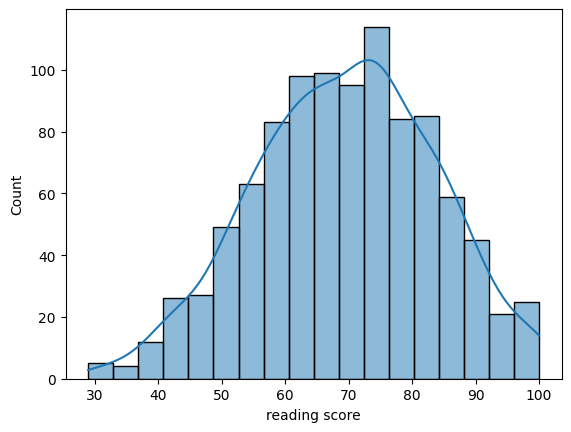

In [78]:
sns.histplot(data=df, x = 'reading score' , kde = True)
plt.show()

In [80]:
df['reading score'] = np.log(df['reading score'])

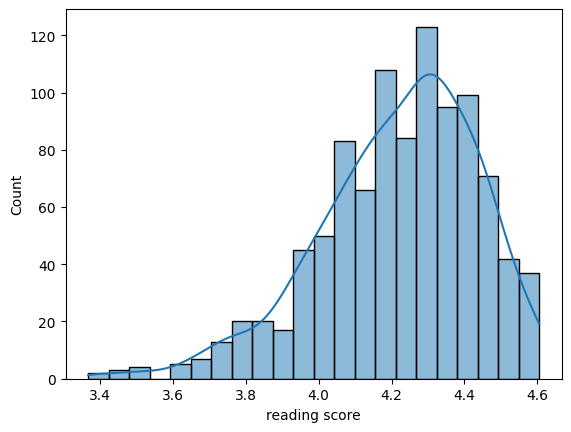

In [81]:
sns.histplot(data=df, x = 'reading score' , kde = True)
plt.show()

In [82]:
df['reading score'] = np.exp(df['reading score'])

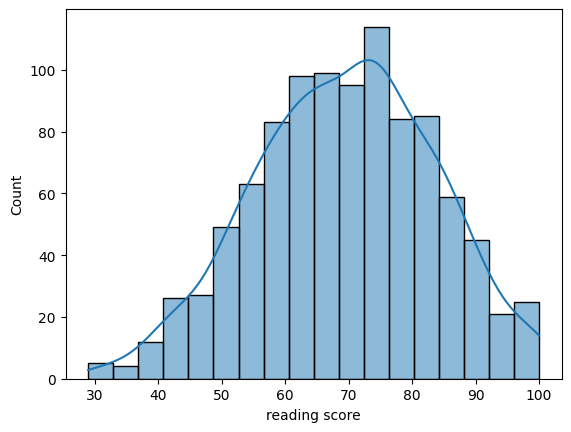

In [83]:
sns.histplot(data=df, x = 'reading score' , kde = True)
plt.show()

In [86]:
standard = StandardScaler()
df['reading score'] = standard.fit_transform(df[['reading score']])

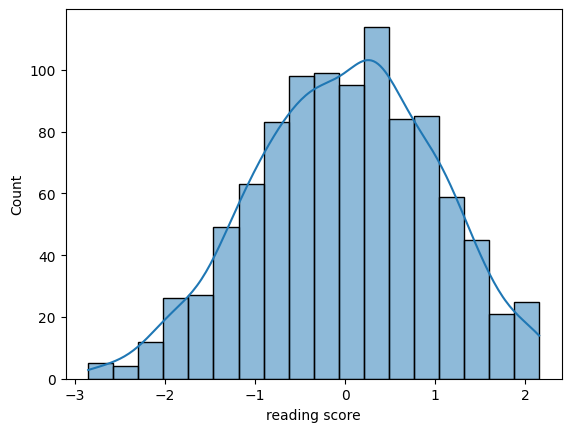

In [87]:
sns.histplot(data=df, x = 'reading score' , kde = True)
plt.show()

In [90]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca_data = pca.fit_transform(df[['reading score']])


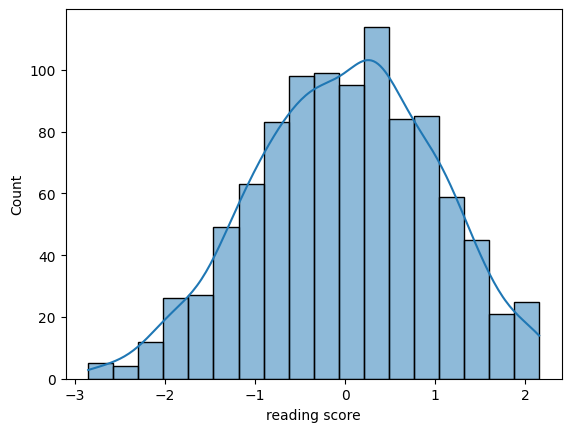

In [91]:
sns.histplot(data=df, x = 'reading score' , kde = True)
plt.show()

In [93]:
# from scipy.stats import boxcox

# transformed_data, _ = boxcox(df['reading score'])


In [94]:
import random
import numpy as np
import pandas as pd

In [95]:
random.randint(1,100)

71

In [96]:
id = []
maths = []
english = []
science = []
for i in range(1100):
    if i<1000:
        id.append(i)
        maths.append(random.randint(1,100))
        english.append(random.randint(1,100))
        science.append(random.randint(1,100))
    elif i>=1000 and i<1050:
        id.append(i)
        maths.append(random.randint(200,500))
        english.append(random.randint(200,500))
        science.append(random.randint(200,500))
    else:
        id.append(i)
        maths.append(None)
        english.append(None)
        science.append(None)
        

In [97]:
df = pd.DataFrame(
    {
        "id":id,
        "maths":maths,
        "english":english,
        "science":science,
    }
)

In [98]:
df.head()

,id,maths,english,science
0,0,55.0,29.0,49.0
1,1,100.0,32.0,86.0
2,2,12.0,35.0,33.0
3,3,97.0,22.0,61.0
4,4,60.0,87.0,7.0
